In [1]:
"""
원핫인코딩:공간낭비, 단어의미x
밀집벡터:공간낭비x, 실수로 표현
"""

'\n원핫인코딩:공간낭비, 단어의미x\n밀집벡터:공간낭비x, 실수로 표현\n'

In [2]:
import re
import urllib.request

In [3]:
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x2525a6bd660>)

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parkm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [7]:
import numpy as np

In [8]:
np.shape(result)
result[270000]
#문장의 갯수가 약 27만개가 조금 넘음

c:\Users\parkm\anaconda3\envs\py_3_10_4\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


['so',
 'i',
 'm',
 'going',
 'to',
 'have',
 'a',
 'moment',
 'to',
 'think',
 'and',
 'i',
 'll',
 'try',
 'to',
 'make',
 'something',
 'out',
 'of',
 'it']

In [9]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [10]:
model.wv.most_similar('man')

[('woman', 0.8354331851005554),
 ('guy', 0.8059917688369751),
 ('lady', 0.7877094745635986),
 ('girl', 0.7444374561309814),
 ('soldier', 0.7385610938072205),
 ('boy', 0.7275438904762268),
 ('gentleman', 0.7248817086219788),
 ('kid', 0.7010221481323242),
 ('poet', 0.6815549731254578),
 ('son', 0.650774359703064)]

In [11]:
###한국어 워드투벡터 모델 생성

In [12]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x25216cd1b70>)

In [13]:
import pandas as pd

In [14]:
train_data=pd.read_table("ratings.txt")

In [15]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [16]:
train_data[train_data['document'].isnull()]
train_data=train_data.dropna(how='any')

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [18]:
#train_data['document'].str.replace("포켓","포겟")

train_data['document']=train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\parkm\AppData\Local\Temp\ipykernel_19004\233562293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document']=train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [19]:
train_data['document']

0                                       어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1         디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...
2                      폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3         와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4                               안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.
                                ...                        
199995                                       포켓 몬스터 짜가 ㅡㅡ;;
199996                                                쓰.레.기
199997                    완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.
199998                  왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ
199999                                      포풍저그가나가신다영차영차영차
Name: document, Length: 199992, dtype: object

In [21]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [22]:
from konlpy.tag import Okt

In [23]:
okt=Okt()

In [24]:
tok_data=[]
for sent in train_data['document']:
    tok_sent=okt.morphs(sent) #토큰화
    sw_rem_sent=[w for w in tok_sent if not w in stopwords]
    tok_data.append(sw_rem_sent)

In [25]:
import matplotlib.pyplot as plt

95


(array([4.2630e+03, 1.4765e+04, 2.7303e+04, 2.9068e+04, 2.4540e+04,
        2.0529e+04, 1.7410e+04, 1.3787e+04, 9.9490e+03, 3.7050e+03,
        5.4030e+03, 3.8660e+03, 3.0720e+03, 2.5930e+03, 2.3290e+03,
        2.0840e+03, 1.7810e+03, 1.6110e+03, 1.3780e+03, 6.5500e+02,
        1.2820e+03, 1.2630e+03, 1.3640e+03, 1.4250e+03, 1.4070e+03,
        1.1810e+03, 8.0800e+02, 4.5800e+02, 3.1700e+02, 9.6000e+01,
        1.1300e+02, 8.2000e+01, 4.5000e+01, 2.6000e+01, 1.7000e+01,
        8.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ,
        20.9, 22.8, 24.7, 26.6, 28.5, 30.4, 32.3, 34.2, 36.1, 38. , 39.9,
        41.8, 43.7, 45.6, 47.5, 49.4, 51.3, 53.2, 55.1, 57. , 58.9, 60.8,
        62.7, 64.6, 66.5, 68.4, 70.3, 72.2, 74.1, 76. , 77.9, 79.8, 81.7,
        83.6, 85.5, 87

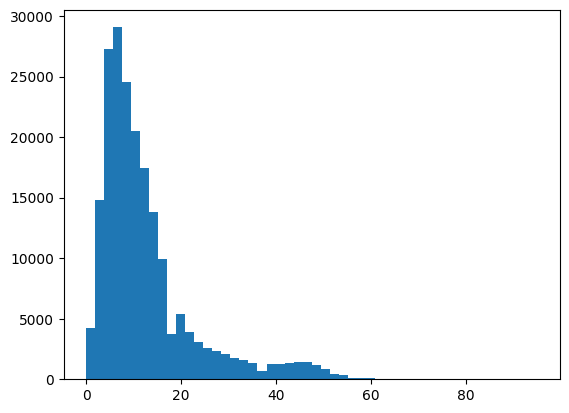

In [26]:
print(max(len(r) for r in tok_data)) #리뷰 최대길이
plt.hist([len(r)for r in tok_data],bins=50)

In [27]:
model = Word2Vec(sentences=tok_data, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [28]:
#model.wv.most_similar("키워드")

In [29]:
model.wv.vectors.shape

(27298, 100)

In [30]:
model.wv.most_similar("컴퓨터")
model.wv.most_similar("책상")
model.wv.most_similar("부모")

[('가정', 0.8762264251708984),
 ('자기', 0.8510666489601135),
 ('서로', 0.8444879055023193),
 ('자식', 0.8417947888374329),
 ('상처', 0.840610146522522),
 ('자유', 0.8396713733673096),
 ('아버지', 0.8342924118041992),
 ('피해자', 0.8286769390106201),
 ('희생', 0.8270099759101868),
 ('의사', 0.8140788078308105)]

In [31]:
#워드투벡터, 글로브, 패스트텍스트, 엘모 -> 트랜스포머 => GPT/BERT
from gensim.models import FastText

In [32]:
model=FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [33]:
model.wv.most_similar("man")

[('batman', 0.8025336861610413),
 ('ekman', 0.7851771116256714),
 ('woman', 0.782616913318634),
 ('guy', 0.7696903347969055),
 ('hoffman', 0.769251823425293),
 ('kahneman', 0.7684391140937805),
 ('shaman', 0.7672421336174011),
 ('lehman', 0.7563912272453308),
 ('fireman', 0.7476258277893066),
 ('foreman', 0.7455546259880066)]

### 스팸메일 분류

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [36]:
data
data.columns
del data['Unnamed: 2']
del data['Unnamed: 4']
del data['Unnamed: 3']

In [37]:
data['v1']=data['v1'].replace(['ham','spam'],[0,1])
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [38]:
data.columns=['label','title']

In [39]:
data
data.info()
data.describe()
data.label.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   title   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


label
0    4825
1     747
Name: count, dtype: int64

In [40]:
data['title'].nunique()

5169

In [41]:
data.drop_duplicates(subset=['title'], inplace=True)

In [42]:
len(data['title'])

5169

In [43]:
"""
meta learning
few shot learning
"""

'\nmeta learning\nfew shot learning\n'

In [44]:
ydata=data['label']
xdata=data['title']

In [45]:
#층화추출:종류에따라 균등하게 분리하여 추출
xtrain, xtest, ytrain, ytest=train_test_split(xdata,ydata,test_size=0.2,
                                              random_state=20230728,
                                              stratify=ydata)

In [46]:
len(ytest)
xtrain.iloc[0]
xtest.iloc[0]

'U still going to the mall?'

In [47]:
xtrain

1420            No. She's currently in scotland for that.
3801            No da. I am happy that we sit together na
1153    1000's of girls many local 2 u who r virgins 2...
3157    Thank u. IT BETTER WORK OUT CAUSE I WILL FEEL ...
4211    Missed call alert. These numbers called but le...
                              ...                        
698                        Mum ask Ì_ to buy food home...
5519    Can you pls send me that company name. In saib...
5503    Perhaps * is much easy give your account ident...
4689                                           Ok no prob
4456    Aight should I just plan to come up later toni...
Name: title, Length: 4135, dtype: object

In [48]:
# 0    4825
# 1     747
ytrain.value_counts()

label
0    3613
1     522
Name: count, dtype: int64

In [49]:
#1. 단어에 대한 전처리(모델 성능 개선)

In [50]:
tok=Tokenizer()
tok.fit_on_texts(xtrain) #xtrain를 코퍼스로하여 fitting(단어별로 index가 부여됨)
xtrain_enc=tok.texts_to_sequences(xtrain)

In [51]:
xtrain_enc

[[35, 743, 936, 8, 1813, 12, 17],
 [35, 83, 1, 61, 124, 17, 34, 1147, 547, 852],
 [2342,
  15,
  611,
  221,
  1148,
  20,
  6,
  148,
  80,
  3500,
  20,
  39,
  80,
  296,
  20,
  2343,
  40,
  217,
  3501,
  75,
  27,
  6,
  2343,
  3502,
  70,
  1149,
  3,
  3503,
  331,
  1505,
  462],
 [355, 6, 14, 249, 145, 51, 580, 1, 38, 200, 744, 1150],
 [463, 18, 1506, 548, 937, 387, 24, 347, 35, 174, 3504],
 [48, 62, 28, 6, 29, 51],
 [2344, 27, 6, 3505, 10, 175, 2345],
 [113,
  11,
  67,
  139,
  3506,
  59,
  3,
  319,
  43,
  2,
  1019,
  1,
  463,
  2,
  22,
  115,
  98,
  30,
  90,
  13,
  407,
  1507,
  33,
  5,
  3507,
  24,
  355,
  2,
  12,
  3508,
  10],
 [72, 10, 13, 549, 7, 1304],
 [113, 49, 35, 693],
 [504, 40, 1508],
 [3,
  5,
  745,
  3509,
  16,
  4,
  120,
  332,
  34,
  3510,
  2,
  320,
  7,
  265,
  2,
  116,
  694,
  65,
  2346],
 [746,
  81,
  18,
  3,
  35,
  2347,
  130,
  13,
  1020,
  15,
  181,
  612,
  277,
  62,
  3,
  274,
  43,
  13,
  107,
  23,
  2348,
  2349

In [52]:
tok.index_word
w2i=tok.word_index

In [53]:
w2i

{'i': 1,
 'you': 2,
 'to': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'that': 17,
 'call': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'so': 22,
 'now': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'can': 27,
 'do': 28,
 'get': 29,
 "i'm": 30,
 'at': 31,
 'be': 32,
 'with': 33,
 'we': 34,
 'no': 35,
 'just': 36,
 'if': 37,
 'will': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'from': 43,
 'lt': 44,
 'gt': 45,
 'how': 46,
 'when': 47,
 'what': 48,
 'ok': 49,
 'go': 50,
 'out': 51,
 'all': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'got': 56,
 'then': 57,
 'was': 58,
 'good': 59,
 'come': 60,
 'am': 61,
 'time': 62,
 'its': 63,
 'want': 64,
 'day': 65,
 'only': 66,
 'love': 67,
 'there': 68,
 'he': 69,
 'text': 70,
 'one': 71,
 'send': 72,
 'by': 73,
 'as': 74,
 'need': 75,
 'going': 76,
 'home': 77,
 'about': 78,
 'still': 79,
 'r': 80,
 'txt': 81,
 'see': 82,
 'da': 83,
 'back': 84,
 'lor'

In [54]:
len(w2i) #7831개

7831

In [55]:
xtrain.shape #4135
xtest.shape #1034

(1034,)

In [56]:
xtrain
xtrain_enc

[[35, 743, 936, 8, 1813, 12, 17],
 [35, 83, 1, 61, 124, 17, 34, 1147, 547, 852],
 [2342,
  15,
  611,
  221,
  1148,
  20,
  6,
  148,
  80,
  3500,
  20,
  39,
  80,
  296,
  20,
  2343,
  40,
  217,
  3501,
  75,
  27,
  6,
  2343,
  3502,
  70,
  1149,
  3,
  3503,
  331,
  1505,
  462],
 [355, 6, 14, 249, 145, 51, 580, 1, 38, 200, 744, 1150],
 [463, 18, 1506, 548, 937, 387, 24, 347, 35, 174, 3504],
 [48, 62, 28, 6, 29, 51],
 [2344, 27, 6, 3505, 10, 175, 2345],
 [113,
  11,
  67,
  139,
  3506,
  59,
  3,
  319,
  43,
  2,
  1019,
  1,
  463,
  2,
  22,
  115,
  98,
  30,
  90,
  13,
  407,
  1507,
  33,
  5,
  3507,
  24,
  355,
  2,
  12,
  3508,
  10],
 [72, 10, 13, 549, 7, 1304],
 [113, 49, 35, 693],
 [504, 40, 1508],
 [3,
  5,
  745,
  3509,
  16,
  4,
  120,
  332,
  34,
  3510,
  2,
  320,
  7,
  265,
  2,
  116,
  694,
  65,
  2346],
 [746,
  81,
  18,
  3,
  35,
  2347,
  130,
  13,
  1020,
  15,
  181,
  612,
  277,
  62,
  3,
  274,
  43,
  13,
  107,
  23,
  2348,
  2349

In [57]:
type(xtrain_enc)
xtrain_enc
sum(map(len, xtrain_enc))/len(xtrain_enc) #메일의 평균 단어 갯수


15.509552599758162

In [58]:
max(map(len, xtrain_enc)) #메일의 최대 단어 갯수
min(map(len, xtrain_enc))#메일의 최대 단어 갯수

0

In [59]:
maxLen=max(len(s) for s in xtrain_enc)

In [60]:
min(len(s) for s in xtrain_enc)

0

In [61]:
xtrain_padded=pad_sequences(xtrain_enc, maxlen=maxLen)

In [62]:
xtrain_padded.shape #(4135, 121)

(4135, 121)

In [63]:
xtrain_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,   35,  743,  936,    8, 1813,   12,   17])

In [64]:
vocab_size=len(w2i)+1 #1번부터 단어의 번호 부여, 0 패딩을 했으므로 1을 더하여 단어사전크기를 설정

In [65]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [66]:
model=Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))

In [67]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
history=model.fit(xtrain_padded, ytrain, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
104/104 [==============================] - 6s 40ms/step - loss: 0.3809 - accuracy: 0.8597 - val_loss: 0.2883 - val_accuracy: 0.8682
Epoch 2/5
104/104 [==============================] - 4s 36ms/step - loss: 0.1716 - accuracy: 0.9368 - val_loss: 0.1597 - val_accuracy: 0.9432
Epoch 3/5
104/104 [==============================] - 4s 36ms/step - loss: 0.0660 - accuracy: 0.9804 - val_loss: 0.0616 - val_accuracy: 0.9843
Epoch 4/5
104/104 [==============================] - 4s 36ms/step - loss: 0.0395 - accuracy: 0.9888 - val_loss: 0.0652 - val_accuracy: 0.9782
Epoch 5/5
104/104 [==============================] - 4s 37ms/step - loss: 0.0325 - accuracy: 0.9912 - val_loss: 0.0727 - val_accuracy: 0.9782


In [69]:
xtest_enc=tok.texts_to_sequences(xtest)

In [70]:
xtest_padded=pad_sequences(xtest_enc, maxlen=maxLen)

In [71]:
#model.predict(xtest_padded)
model.evaluate(xtest_padded,ytest)

33/33 [==============================] - 1s 18ms/step - loss: 0.0666 - accuracy: 0.9807


[0.06657522171735764, 0.9806576371192932]

In [72]:
model.evaluate(xtest_padded,ytest)[1]

33/33 [==============================] - 1s 18ms/step - loss: 0.0666 - accuracy: 0.9807


0.9806576371192932